In [6]:
# 階層的クラスター分析
# 最長距離法、最短距離法、群平均法、重心法、
# ウォード法　”点を付け加えたらクラスター内の距離の和がどれだけ増えるか”を距離の代わりにする

In [7]:
csv = '
,品川 ,目黒 ,渋谷 ,原宿 ,新宿 ,高田馬場 ,池袋 ,巣鴨 ,田端 ,日暮里 ,上野 ,秋葉原 ,東京 ,新橋 
品川 ,0,7,12,14,18,22,25,28,24,21,17,14,10,7
目黒 ,7,0,5,7,11,15,18,23,31,28,24,21,17,14
渋谷 ,12,5,0,2,6,10,13,18,22,25,29,26,22,19
原宿 ,14,7,2,0,4,8,11,16,20,23,27,28,24,21
新宿 ,18,11,6,4,0,4,7,12,16,19,23,26,28,25
高田馬場 ,22,15,10,8,4,0,3,8,12,15,19,22,26,29
池袋 ,25,18,13,11,7,3,0,5,9,12,16,19,23,26
巣鴨 ,28,23,18,16,12,8,5,0,4,7,11,14,18,21
田端 ,24,31,22,20,16,12,9,4,0,3,7,10,14,17
日暮里 ,21,28,25,23,19,15,12,7,3,0,4,7,11,14
上野 ,17,24,29,27,23,19,16,11,7,4,0,3,7,10
秋葉原 ,14,21,26,28,26,22,19,14,10,7,3,0,4,7
東京 ,10,17,22,24,28,26,23,18,14,11,7,4,0,3
新橋 ,7,14,19,21,25,29,26,21,17,14,10,7,3,0
'
table = read.csv(text = csv, header = T, row.names = 1)
dist = as.dist(table) # hclustで扱える左下成分のみの形式

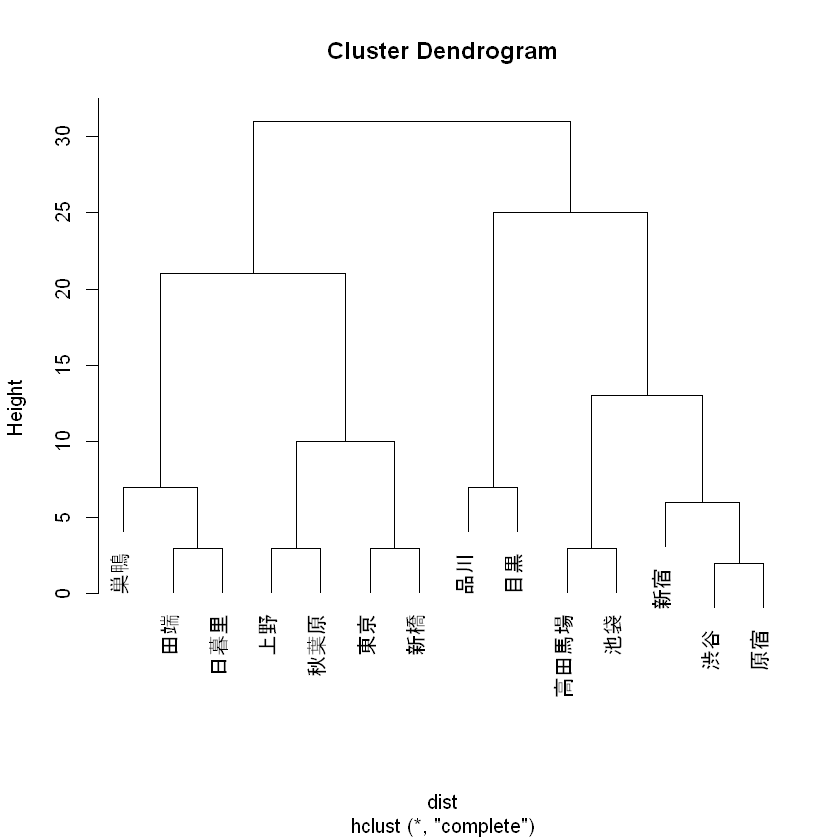

In [8]:
plot(hclust(dist))

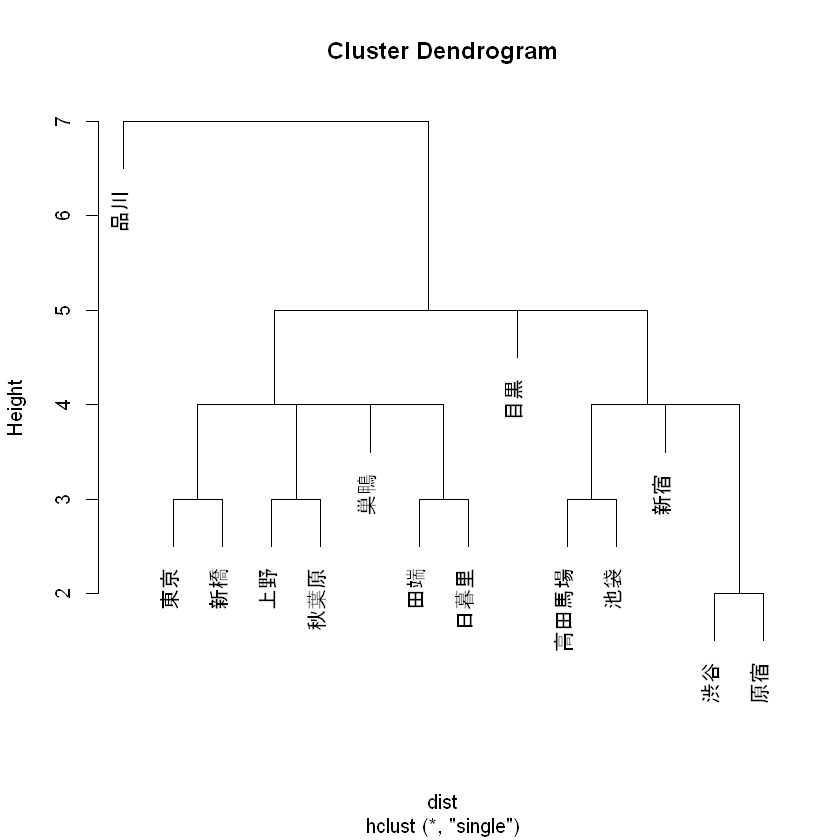

In [9]:
plot(hclust(dist, method = 'single'))

In [12]:
tree = hclust(dist, method = 'ward.D2')
cutree(tree, 4)

品川      目黒      渋谷      原宿      新宿  高田馬場      池袋      巣鴨  
        1         1         2         2         2         2         2         3 
    田端    日暮里      上野    秋葉原      東京      新橋  
        3         3         4         4         4         4

In [13]:
cophenetic(tree)

              品川      目黒      渋谷      原宿      新宿  高田馬場      池袋 
目黒       7.000000                                                            
渋谷      24.847535 24.847535                                                  
原宿      24.847535 24.847535  2.000000                                        
新宿      24.847535 24.847535  5.773503  5.773503                              
高田馬場  24.847535 24.847535 13.684541 13.684541 13.684541                    
池袋      24.847535 24.847535 13.684541 13.684541 13.684541  3.000000          
巣鴨      48.416349 48.416349 48.416349 48.416349 48.416349 48.416349 48.416349
田端      48.416349 48.416349 48.416349 48.416349 48.416349 48.416349 48.416349
日暮里    48.416349 48.416349 48.416349 48.416349 48.416349 48.416349 48.416349
上野      48.416349 48.416349 48.416349 48.416349 48.416349 48.416349 48.416349
秋葉原    48.416349 48.416349 48.416349 48.416349 48.416349 48.416349 48.416349
東京      48.416349 48.416349 48.416349 48.416349 48.416349 48.416349 48.416349
新橋  

In [12]:
# 非階層的クラスター分析

In [17]:
data = '
name	x	y
C1	1	1
C2	2	1
C3	1	3
C4	4	5
C5	5	5
C6	5	3
'
table = read.table(text = data, header = T, row.names = 1)
k = kmeans(table, 2)
k

K-means clustering with 2 clusters of sizes 3, 3

Cluster means:
         x        y
1 1.333333 1.666667
2 4.666667 4.333333

Clustering vector:
C1 C2 C3 C4 C5 C6 
 1  1  1  2  2  2 

Within cluster sum of squares by cluster:
[1] 3.333333 3.333333
 (between_SS / total_SS =  80.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

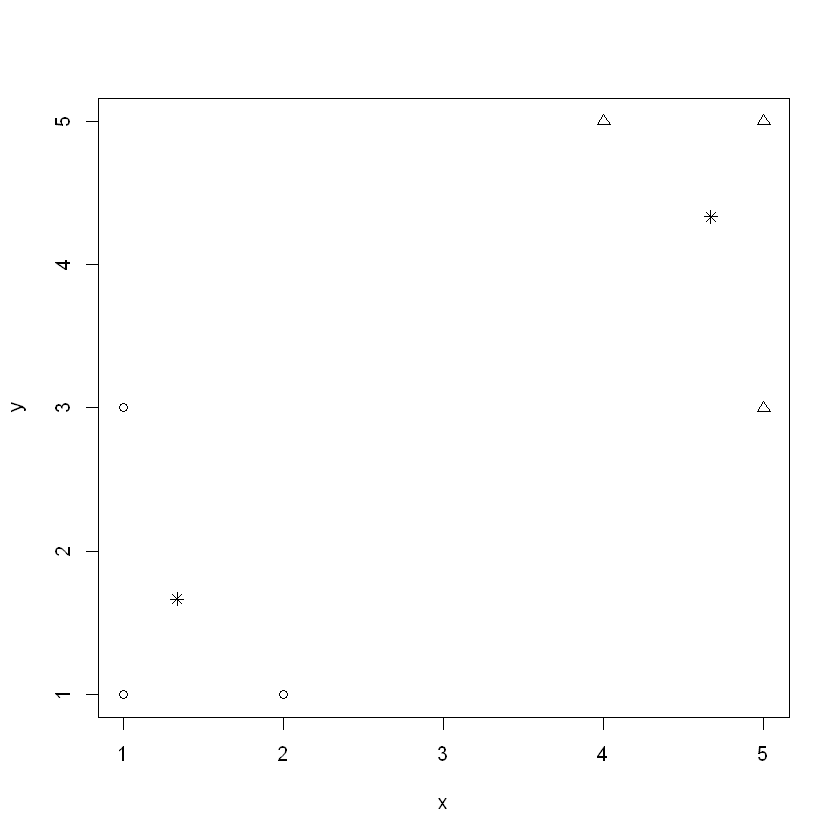

In [18]:
plot(table, pch = k$cluster)
points(k$centers, pch = 8)

In [ ]:
data(iris)
iris2 = iris[51:150, 1:4]
k = kmeans(iris2, 2)
k

In [ ]:
plot(iris2, pch = k$cluster)

In [ ]:
table(c(rep(1,50),rep(2,50)), k$cluster) # 分類の成否